In [4]:
! pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 19.4 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

image_path = './images'

In [77]:
def skinDetectionHSV(img):
    # Convert img to HSV
    imgHSV = cv.cvtColor(img, cv.COLOR_BGR2HSV)

    # Boundaries for the HSV colorspace
    lowerBoundHSV = np.array([0, 0, 30])
    upperBoundHSV = np.array([90, 100, 255])

    # Create mask
    mask = cv.inRange(imgHSV, lowerBoundHSV, upperBoundHSV)

    # Apply mask to original image
    imgMasked = cv.bitwise_and(img, img, mask=mask)
    
    

    # Show image
    # cv.imshow('Original', img)
    # cv.imshow('Mask', mask)
    # cv.imshow('Masked Image', imgMasked)

    return imgMasked

def skinDetectionYCC(img):
    # Convert img to YCrCb
    imgYCC = cv.cvtColor(img, cv.COLOR_BGR2YCrCb)

    # Boundaries for the YCrCb colorspace
    lowerBoundYCC = np.array([0, 133, 77])
    upperBoundYCC = np.array([235, 173, 127])

    # Create mask
    mask = cv.inRange(imgYCC, lowerBoundYCC, upperBoundYCC)

    # Apply mask to original image
    imgMasked = cv.bitwise_and(img, img, mask=mask)

    # Show image
    cv.imshow('Original', img)
    cv.imshow('Mask', mask)
    cv.imshow('Masked Image', imgMasked)

    return imgMasked

def calcPrecision(img, gt):
    # Convert to grayscale
    imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    gtGray = cv.cvtColor(gt, cv.COLOR_BGR2GRAY)

    # Thresholding
    ret, imgThresh = cv.threshold(imgGray, 0, 255, cv.THRESH_BINARY)
    ret, gtThresh = cv.threshold(gtGray, 0, 255, cv.THRESH_BINARY)

    # Calculate precision

    if cv.countNonZero(imgThresh) == 0:
        precision = 0
    else:
        precision = cv.countNonZero(imgThresh & gtThresh) / (cv.countNonZero(imgThresh))
        
    print('Precision: ', precision)

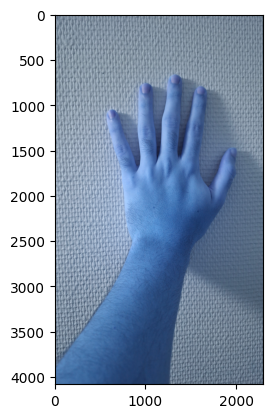

In [70]:
# Read image
img = cv.imread(f'{image_path}/hand1.jpg')
groundTruth = cv.imread(f'{image_path}/hand1_GT.jpg')

# img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)
# plt.imshow(groundTruth)

Precision:  0.3061999342419895


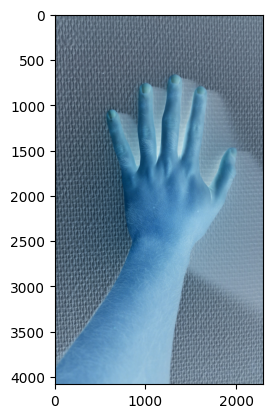

In [78]:
# Apply skin detection
imgSkinHSV = skinDetectionHSV(img)
calcPrecision(imgSkinHSV, groundTruth)

# imgSkinYCC = skinDetectionYCC(img)
# calcPrecision(imgSkinYCC, groundTruth)

imgSkinHSV = cv.cvtColor(imgSkinHSV, cv.COLOR_BGR2RGB)

plt.imshow(imgSkinHSV)